In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.figure()
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()

In [3]:
#匯入資料
data = pd.read_csv("C:\\Bias_correction_ucl.csv")

data = data.drop(["Date"], axis=1)
data = data.dropna()

In [4]:
#切割訓練、測試集
X = data.drop(["Next_Tmax", "Next_Tmin"], axis=1)
y = data["Next_Tmax"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [5]:
#資料標準化
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
X = pd.DataFrame(scaled_features, columns=data.columns[:-2])

In [6]:
#KNN(n=3)調整前
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train.astype("string"))
pred = knn.predict(X_test)

MAE = metrics.mean_squared_error(y_test, pred)

print("KNN調整前之MAE:", MAE)
print("KNN調整前之RMAE:", math.sqrt(MAE))
print("KNN調整前之MAPE:", metrics.mean_absolute_percentage_error(y_test, pred))

KNN調整前之MAE: 8.728120333772507
KNN調整前之RMAE: 2.9543392380991906
KNN調整前之MAPE: 0.07163582763366123


In [7]:
#SVR調整前
svr = svm.SVR(C=1)
svr.fit(X_train, y_train)
pred = svr.predict(X_test)

MAE = metrics.mean_squared_error(y_test, pred)

print("SVR調整前之MAE:", MAE)
print("SVR調整前之RMAE:", math.sqrt(MAE))
print("SVR調整前之MAPE:", metrics.mean_absolute_percentage_error(y_test, pred))

SVR調整前之MAE: 9.524593335702887
SVR調整前之RMAE: 3.086193988670007
SVR調整前之MAPE: 0.08656282809784473


In [8]:
#RandomForest調整前
randomForest = RandomForestRegressor(n_estimators=100, criterion = "mse")
randomForest.fit(X_train, y_train)
pred = randomForest.predict(X_test)

MAE = metrics.mean_squared_error(y_test, pred)

print("RandomForest調整前之MAE:", MAE)
print("RandomForest調整前之RMAE:", math.sqrt(MAE))
print("RandomForest調整前之MAPE:", metrics.mean_absolute_percentage_error(y_test, pred))

RandomForest調整前之MAE: 1.0223563724198494
RandomForest調整前之RMAE: 1.0111163990460492
RandomForest調整前之MAPE: 0.025554611754237636


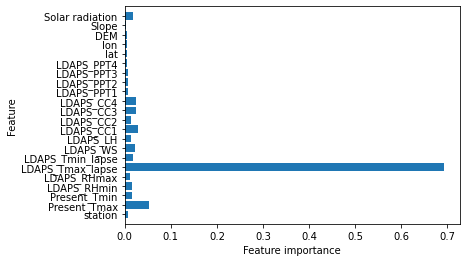

In [9]:
#特徵重要性-以RandomForest Model找尋重要性最高之特徵
plot_feature_importances(randomForest)

In [10]:
#刪除重要性最高之特徵-LDAPS_Tmax_lapse
X_train = X_train.drop(["LDAPS_Tmax_lapse"], axis=1)
X_test = X_test.drop(["LDAPS_Tmax_lapse"], axis=1)

In [11]:
#KNN(n=3)調整後
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train.astype("string"))
pred = knn.predict(X_test)

MAE = metrics.mean_squared_error(y_test, pred)

print("KNN調整後之MAE:", MAE)
print("KNN調整後之RMAE:", math.sqrt(MAE))
print("KNN調整後之MAPE:", metrics.mean_absolute_percentage_error(y_test, pred))

KNN調整後之MAE: 9.215331576635924
KNN調整後之RMAE: 3.0356764611262386
KNN調整後之MAPE: 0.07335915373184279


In [12]:
#SVR調整後
svr = svm.SVR(C=1)
svr.fit(X_train, y_train)
pred = svr.predict(X_test)

MAE = metrics.mean_squared_error(y_test, pred)

print("SVR調整後之MAE:", MAE)
print("SVR調整後之RMAE:", math.sqrt(MAE))
print("SVR調整後之MAPE:", metrics.mean_absolute_percentage_error(y_test, pred))

SVR調整後之MAE: 9.534384416115058
SVR調整後之RMAE: 3.087779852274941
SVR調整後之MAPE: 0.08660609974546149


In [13]:
#RandomForest調整後
randomForest = RandomForestRegressor(n_estimators=100, criterion = "mse")
randomForest.fit(X_train, y_train)
pred = randomForest.predict(X_test)

MAE = metrics.mean_squared_error(y_test, pred)

print("RandomForest調整後之MAE:", MAE)
print("RandomForest調整後之RMAE:", math.sqrt(MAE))
print("RandomForest調整後之MAPE:", metrics.mean_absolute_percentage_error(y_test, pred))

RandomForest調整後之MAE: 0.9906771638120332
RandomForest調整後之RMAE: 0.9953276665561112
RandomForest調整後之MAPE: 0.0244594103590644
